In [22]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


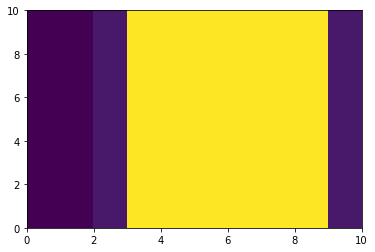

In [50]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((10,10))  # relative permittivity
# eps_r[40:60, 40:60] = 5     # define box
NPML = [3, 3]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

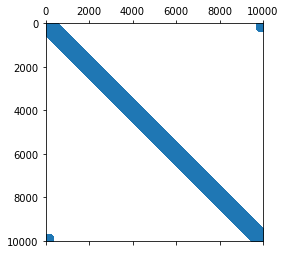

In [36]:
# look at sparsity pattern of A
plt.spy(simulation.A)
plt.show()

In [37]:
simulation.A[99,0]

(-0.1429642395963779+0.020737991776010965j)

In [38]:
simulation.A[0,99]

(-0.062107124093369895+0.005207901838469111j)

In [34]:
print(simulation.A)

  (99, 0)	(-0.1429642395963779+0.020737991776010965j)
  (1, 0)	(-0.13485073594900082+0.01676454865513618j)
  (0, 0)	(1.3056308006502386-0.028845653923051953j)
  (9900, 0)	(-0.1429642395963779+0.020737991776010965j)
  (100, 0)	(-0.13485073594900082+0.01676454865513618j)
  (0, 1)	(-0.09070827623174937+0.009214925123056867j)
  (2, 1)	(-0.3156238343696655+0.060907227866667j)
  (1, 1)	(1.491956819381941-0.06262306108317046j)
  (9901, 1)	(-0.1429642395963779+0.020737991776010965j)
  (101, 1)	(-0.13485073594900082+0.01676454865513618j)
  (1, 2)	(-0.20429068310782092+0.0314356854665083j)
  (3, 2)	(-0.797146390917848+0.2543192228294923j)
  (2, 2)	(1.9656868343113862-0.1975427491574841j)
  (9902, 2)	(-0.1429642395963779+0.020737991776010965j)
  (102, 2)	(-0.13485073594900082+0.01676454865513618j)
  (2, 3)	(-0.49724759961660153+0.1222126943292911j)
  (4, 3)	(-2.0812458606301814+1.2178979670616201j)
  (3, 3)	(3.2417678493127426-0.8171343004500798j)
  (9903, 3)	(-0.1429642395963779+0.02073799177601

In [44]:
# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))*1j
b[5,5] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b, timing=True, solver='pardiso')
(Hx1,Hy1,Ez1) = simulation.solve_fields(b, timing=True, solver='pardiso.parts')
(Hx2,Hy2,Ez2) = simulation.solve_fields(b, timing=True, solver='scipy')

Linear system solve took 0.00 seconds
Linear system solve took 0.00 seconds
Linear system solve took 0.00 seconds


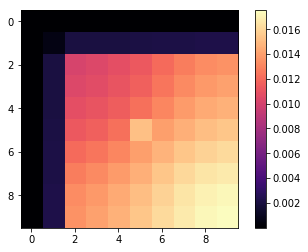

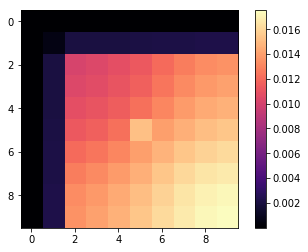

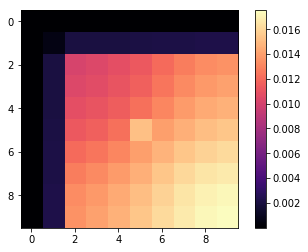

In [45]:
# plot
plt.figure()
plt.imshow(np.abs(Ez), cmap='magma')
plt.colorbar()
# plot
plt.figure()
plt.imshow(np.abs(Ez1), cmap='magma')
plt.colorbar()
# plot
plt.figure()
plt.imshow(np.abs(Ez2), cmap='magma')
plt.colorbar()

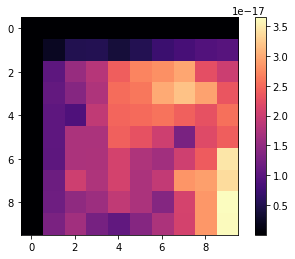

In [46]:
# plot
plt.figure()
plt.imshow(np.abs(Ez-Ez1), cmap='magma')
plt.colorbar()

In [47]:
from scipy.sparse import coo_matrix
def is_symmetric(m):
    """Check if a sparse matrix is symmetric

    Parameters
    ----------
    m : array or sparse matrix
        A square matrix.

    Returns
    -------
    check : bool
        The check result.

    """
    if m.shape[0] != m.shape[1]:
        raise ValueError('m must be a square matrix')

    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)

    r, c, v = m.row, m.col, m.data
    tril_no_diag = r > c
    triu_no_diag = c > r

    if triu_no_diag.sum() != tril_no_diag.sum():
        return False

    rl = r[tril_no_diag]
    cl = c[tril_no_diag]
    vl = v[tril_no_diag]
    ru = r[triu_no_diag]
    cu = c[triu_no_diag]
    vu = v[triu_no_diag]

    sortl = np.lexsort((cl, rl))
    sortu = np.lexsort((ru, cu))
    vl = vl[sortl]
    vu = vu[sortu]

    check = np.allclose(vl, vu)

    return check

is_symmetric(simulation.A)

False

In [50]:
print(simulation.A)

  (0, 0)	(1.0043593413481815-6.190979768667116e-05j)
  (1, 0)	(-0.014022100059985535+0.0006489049680743264j)
  (9, 0)	(-0.024537754957096054+0.0703374629924016j)
  (10, 0)	(-0.014022100059985535+0.0006489049680743264j)
  (90, 0)	(-0.024537754957096054+0.0703374629924016j)
  (0, 1)	(-0.0018200894990952365+2.8527522927463267e-05j)
  (1, 1)	(1.232424524227652-0.04703362610587233j)
  (2, 1)	(-0.9570102792180928+5.8632203983343505j)
  (11, 1)	(-0.014022100059985535+0.0006489049680743264j)
  (91, 1)	(-0.024537754957096054+0.0703374629924016j)
  (1, 2)	(-0.21622275349357556+0.046353766238954666j)
  (2, 2)	(-30.041947863161962-17.105987506639124j)
  (3, 2)	(35.95096975195287+0j)
  (12, 2)	(-0.014022100059985535+0.0006489049680743264j)
  (92, 2)	(-0.024537754957096054+0.0703374629924016j)
  (2, 3)	(32.00113781305415+11.242736153405932j)
  (3, 3)	(-70.89975983323164-3.095489884333558e-05j)
  (4, 3)	(35.95096975195287+0j)
  (13, 3)	(-0.014022100059985535+0.0006489049680743264j)
  (93, 3)	(-0.0245